<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/05-Statistical/Calculate_the_KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/divergence-between-probability-distributions/

In [9]:
from math import log2

In [1]:
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

P=1.000 Q=1.000


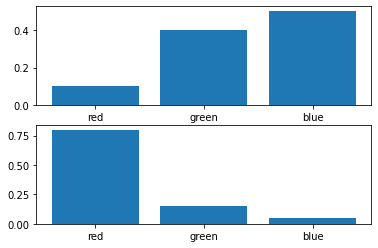

In [2]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [10]:
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [11]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


In [12]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 1.336 nats
KL(Q || P): 1.401 nats


In [13]:
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 * (p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [15]:
# example of calculating the js divergence between two mass functions
from math import log2
from math import sqrt
from numpy import asarray

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 * (p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

# define distributions
p = asarray([0.10, 0.40, 0.50])
q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648
